In [1]:
# Import log json file and view Gantt chart of the log
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

def graphResults(logs, labels, ref, title, subtitle):
    '''Graph the results'''

    i=0
    for log in logs:
        if labels:
            plt.plot(log, label=labels[i])
        else:
            plt.plot(log)
        i+=1
    
    # Horizontal line for reference
    plt.axhline(y=ref, color='red', linestyle='dashed')
    
    # Add labels
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(subtitle)
    plt.suptitle(title)
    # Add legend
    plt.legend()
    #plt.show()

    # Save the figure
    timestamp = time()
    plt.savefig(title+str(timestamp)+'.png')

def getDataGantt(logs, title):
    n = len(logs)
    #tt, s, x = getCycleTime(t, l, L, W)
    dflist = []

    j = 0
    for log in logs: # Node logs
        i = 0
        for iterlog in log: # Operations
            if i > 50:
                break
            start = iterlog['start']
            stop = iterlog['end']
            if j==0 and i==0:
                offset = start
            start = start - offset
            stop = stop - offset
            #start = s[i,j]
            #stop = start + t[j]
            dflist.append(dict(Task="Iter %s" % i, Start=start, Finish=stop, Resource="Node %s" % j))
            i += 1
        j += 1
    df = pd.DataFrame(dflist)
    df['delta'] = df['Finish'] - df['Start']
    # Export df to csv
    #df.to_csv(title+'.csv')

    fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Task")
    fig.update_yaxes(autorange="reversed") 

    fig.layout.xaxis.type = 'linear'
    for d in fig.data:
        filt = df['Task'] == d.name
        d.x = df[filt]['delta'].tolist()

    fig.update_layout(title_text=title)
    return fig


In [10]:
# Import log file logs_lambert1710*.json
LW_titles = ['full', 'MT', 'block2']
logs = []
for title in LW_titles:
    log = []
    for node in range(10):
        logname = 'logs_wta'+str(node)+'_'+title+'.json'
        with open(logname) as f:
            data = json.load(f)
        log.append(data)
    logs.append(log)

# Data is a list of lists with the following structure:
# data = [[node1_1, node1_2, ... ],[node2_1, node2_2, ...],...]
# where log1 is a dictionary with the following structure:
# log1 = {'start': 0, 'end': 0, 'value': 0, 'time': 0}



In [12]:
len(logs[0])


10

In [13]:
fig = getDataGantt(logs[0], "Parallel WTA Full")
fig.show()

In [14]:
fig = getDataGantt(logs[1], "Parallel WTA MT")
fig.show()

In [15]:
# Block
fig = getDataGantt(logs[2], "Parallel WTA Block")
fig.show()


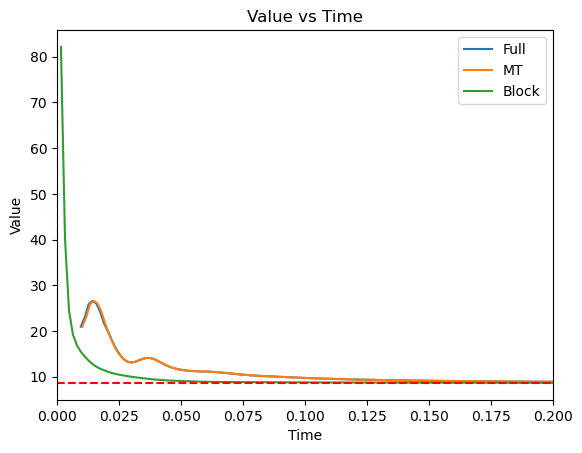

In [26]:
# Plot the value entry in last log for each of the three methods
# Against the time delta 
# Get the last value of each log
values = []
time_deltas = []
for log in logs:
    start = log[0][0]['start']
    values.append([e['value'] for e in log[-1]])
    time_deltas.append([e['end']-start for e in log[-1]])

plt.plot(time_deltas[0], values[0], label='Full')
plt.plot(time_deltas[1], values[1], label='MT')
plt.plot(time_deltas[2], values[2], label='Block')
plt.axhline(y=8.629, color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')

# Only display x-axis less than 0.2
plt.xlim(0, 0.2)
plt.title('Value vs Time')
plt.legend()

plt.show()

In [24]:
time_deltas[0]

[1711400159.395944,
 1711400159.3976145,
 1711400159.3991272,
 1711400159.4006643,
 1711400159.4022014,
 1711400159.403703,
 1711400159.405213,
 1711400159.407337,
 1711400159.408863,
 1711400159.410377,
 1711400159.4118643,
 1711400159.4133735,
 1711400159.414861,
 1711400159.4163587,
 1711400159.4178526,
 1711400159.4193485,
 1711400159.420844,
 1711400159.4223409,
 1711400159.4238331,
 1711400159.4253466,
 1711400159.426835,
 1711400159.428322,
 1711400159.4298098,
 1711400159.4312992,
 1711400159.4327793,
 1711400159.4342754,
 1711400159.435792,
 1711400159.4373186,
 1711400159.4387937,
 1711400159.4402726,
 1711400159.4417434,
 1711400159.4432275,
 1711400159.444692,
 1711400159.4461684,
 1711400159.447638,
 1711400159.4491143,
 1711400159.4506009,
 1711400159.452066,
 1711400159.453541,
 1711400159.45502,
 1711400159.4564884,
 1711400159.4579573,
 1711400159.459435,
 1711400159.461101,
 1711400159.462571,
 1711400159.464041,
 1711400159.4655232,
 1711400159.467012,
 1711400159.46